In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df.iloc[:,:-1]
y = df['PRICE']

X_std = (X - X.mean()) / X.std()

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_std, y)
lreg.score(X_std, y)

0.7406426641094095

In [4]:
coeffs=pd.DataFrame({
    "Variable":X.columns,
    "Weight":lreg.coef_
}).sort_values(by="Weight",ascending=False)

coeffs

,Variable,Weight
5,RM,2.676877
8,RAD,2.664852
1,ZN,1.082639
11,B,0.850109
3,CHAS,0.682414
2,INDUS,0.141039
6,AGE,0.019485
0,CRIM,-0.929065
4,NOX,-2.058754
10,PTRATIO,-2.062646


In [5]:
df['PREDICTION']=lreg.predict(X_std)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


In [7]:
import seaborn as sns

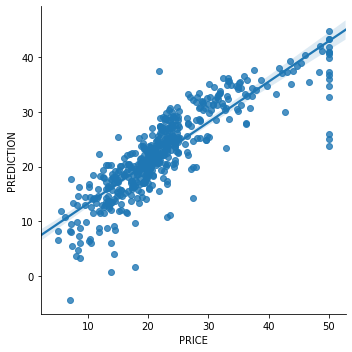

In [8]:
sns.lmplot(x='PRICE',y='PREDICTION',data=df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#using scikit learn to split up test and validation
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=.2,random_state=2019)

In [11]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lreg.score(X_train,y_train)

0.7581321815069204

In [13]:
print("Training score: ",lreg.score(X_train,y_train),"Test score: ",lreg.score(X_test,y_test))

Training score:  0.7581321815069204 Test score:  0.617406599912789


In [14]:
#k-fold validation
from sklearn.model_selection import cross_val_score

scores=cross_val_score(estimator=lreg,X=X_train,y=y_train,cv=10)

In [15]:
scores

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [16]:
np.mean(scores)

0.7275668192780949

In [17]:
np.std(scores)

0.07839580317172444

In [18]:
y_log=np.log1p(y)

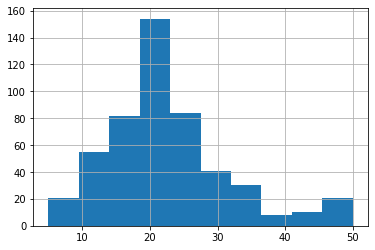

In [19]:
y.hist()

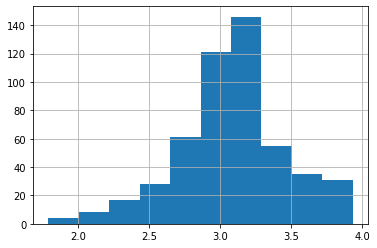

In [20]:
y_log.hist()

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y_log,test_size=.2,random_state=69)

In [22]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lreg.score(X_train,y_train)

0.79725011494641

In [24]:
print("Training score: ",lreg.score(X_train,y_train),"Test score: ",lreg.score(X_test,y_test))

Training score:  0.79725011494641 Test score:  0.7339901345584194


In [25]:
scores1=cross_val_score(estimator=lreg,X=X_train,y=y_train,cv=10)

In [26]:
scores1

array([0.7508723 , 0.74028151, 0.78624092, 0.70955077, 0.74326542,
       0.83752596, 0.84894247, 0.68384071, 0.76103925, 0.80054323])

In [27]:
scores1.mean()

0.7662102538680304

In [28]:
scores1.std()

0.04996631501396002

In [29]:
lreg.predict(X_train)

array([2.83707475, 3.54885049, 3.61279708, 2.78557947, 2.58206966,
       2.71471613, 2.92804909, 2.89569001, 2.77400927, 2.60752401,
       3.10154377, 3.43967613, 3.56743236, 2.86412901, 2.95217363,
       3.54407924, 2.97911305, 3.44011219, 2.53028478, 2.97520731,
       3.28341834, 3.47761658, 2.49848729, 3.21008921, 2.66462019,
       3.16565433, 3.06241573, 3.01595051, 3.58701296, 3.1125449 ,
       3.15161457, 2.77212297, 3.78747927, 3.3212517 , 2.77483374,
       3.14871035, 3.3409518 , 2.81007509, 3.41767609, 3.23983061,
       3.44792105, 3.20533466, 2.1192696 , 3.06362901, 3.3408789 ,
       3.07262319, 2.75868923, 3.76456738, 3.38302905, 3.7638383 ,
       3.15484061, 2.75656722, 3.50848665, 3.64012262, 2.90721773,
       3.60240976, 3.6465149 , 3.06888312, 3.13849533, 3.01701549,
       3.49885636, 3.75917181, 3.21960325, 2.93425601, 3.22928338,
       2.93677832, 2.5563079 , 3.22472557, 2.94287555, 3.51624996,
       3.51286889, 3.08502902, 3.15723047, 3.34348204, 3.12410

In [30]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lreg.score(X_test,y_test)

0.7339901345584194

In [41]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

rreg=Ridge()
alphas = np.logspace(-4,4,9)
rreg_scores=[]
for alpha in alphas:
    rreg.set_params(alpha=alpha)
    scores=cross_val_score(estimator=rreg,X=X_train,y=y_train,cv=10)
    rreg_scores.append((np.mean(scores),alpha))

In [43]:
max(rreg_scores)

(0.766359835387631, 1.0)

In [44]:
np.logspace(-4,4,9)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [52]:
rreg.set_params(alpha=10)
rreg.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [54]:
rreg.score(X_test,y_test)

0.7504410956580949

In [49]:
from sklearn.linear_model import Lasso
lareg=Lasso()
alphas1=np.logspace(-4,4,9)
lareg_scores=[]
for alpha in alphas1:
    lareg.set_params(alpha=alpha)
    scores1=cross_val_score(estimator=lareg,X=X_train,y=y_train,cv=10)
    lareg_scores.append((np.mean(scores1),alpha))

In [50]:
max(lareg_scores)

(0.7662229417963122, 0.0001)

In [51]:
lareg.coef_

AttributeError: 'Lasso' object has no attribute 'coef_'